# Practice Exercise Linear Regression

## We will be using the Boston house price dataset for this exercise.
#### This dataset is in-built in Python in the Sci-kit learn library. But for this exercise, we have already downloaded this dataset in the form of a csv file.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

**Load the dataset**

In [2]:
df=pd.read_csv('Boston.csv')

**Check the data description**

In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Check the shape of the dataset**

In [4]:
df.shape

(506, 14)

**Get the info data types column wise**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


**Get the summary statistics of the dataset**

**Get the Correlation Heatmap**

<AxesSubplot:>

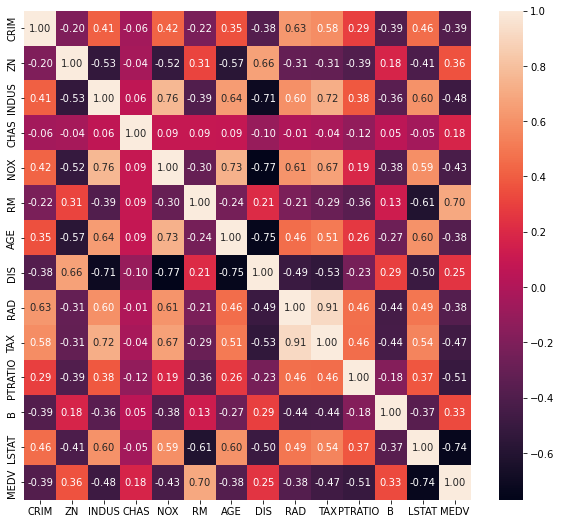

In [6]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

**Split the dataset**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=df.drop('MEDV',axis=1)
Y=df.pop('MEDV')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

## Using Statsmodels OLS

In [10]:
import statsmodels.formula.api as smf

**Make the linear model using OLS**

In [11]:
data_train=pd.concat([X_train,y_train],axis=1)
data_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44,16.0
377,9.82349,0.0,18.10,0,0.671,6.794,98.8,1.3580,24,666,20.2,396.90,21.24,13.3
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5


In [12]:
formula='MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'
lm=smf.ols(formula,data=data_train).fit()
lm.params

Intercept    46.396494
CRIM         -0.098542
ZN            0.060784
INDUS         0.059172
CHAS          2.439560
NOX         -21.469965
RM            2.795814
AGE           0.003575
DIS          -1.516272
RAD           0.307542
TAX          -0.011280
PTRATIO      -1.005466
B             0.006450
LSTAT        -0.568835
dtype: float64

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     64.15
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           3.56e-83
Time:                        03:36:42   Log-Likelihood:                -1061.2
No. Observations:                 354   AIC:                             2150.
Df Residuals:                     340   BIC:                             2205.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3965      6.361      7.294      0.000      33.884      58.909
CRIM          -0.0985      0.044     -2.259      0.025      -0.184      -0.013
ZN             0.0608      0.019      3.279      0.001       0.024       0.097
INDUS          0.0592      0.077      0.770      0.442      -0.092       0.210
CHAS           2.4396      0.981      2.488      0.013       0.511       4.368
NOX          -21.4700      4.697     -4.571      0.000     -30.708     -12.232
RM             2.7958      0.521      5.364      0.000       1.771       3.821
AGE            0.0036      0.017      0.216      0.829      -0.029       0.036
DIS           -1.5163      0.257     -5.892      0.000      -2.022      -1.010
RAD            0.3075      0.087      3.553      0.000       0.137       0.478
TAX           -0.0113      0.005     -2.283      0.023      -0.021      -0.002
PTRATIO       -1.0055      0.171     -5.873      0.000      -1.342      -0.669
B              0.0065      0.003      1.881      0.061      -0.000       0.013
LSTAT         -0.5688      0.062     -9.190      0.000      -0.691      -0.447
==============================================================================
Omnibus:                      136.364   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              564.275
Skew:                           1.642   Prob(JB):                    2.95e-123
Kurtosis:                       8.241   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Get the value of coefficient of determination**

In [14]:
lm.rsquared

0.7103879080674731

**Get the Predictions on test set**

In [15]:
ypredict=lm.predict(X_test)
ypredict

307    32.391465
343    27.944013
47     17.837628
67     21.669414
362    18.936396
         ...    
467    17.329959
95     28.360234
122    20.794228
260    33.698157
23     13.518827
Length: 152, dtype: float64

**Calculate MSE for training set**

**Get the RMSE on training set**

In [16]:
mse=np.mean((lm.predict(X_train)-y_train)**2)
import math
math.sqrt(mse)

4.849055005805461

**Get the RMSE on test set**

In [17]:
mse=np.mean((ypredict-y_test)**2)
import math
math.sqrt(mse)

4.453237437198133

## Using Linear Model from Sci-kit learn library

**Fit the model to the training set**

In [18]:
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

**Get the score on training set**

In [19]:
regression_model.score(X_train,y_train)

0.7103879080674731

**Get the score on test set**

In [20]:
regression_model.score(X_test,y_test)

0.7836295385076268

**Get the RMSE on test set**

In [21]:
np.sqrt(np.mean((regression_model.predict(X_test)-y_test)**2))

4.453237437198173

**Check Multi-collinearity using VIF**

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [24]:
vif=[variance_inflation_factor(X.values,ix) for ix in range(X.shape[1])]
vif

[2.1003728199615233,
 2.8440132669462646,
 14.485757706539308,
 1.1529518589418777,
 73.89494652814788,
 77.94828304638538,
 21.38685048994314,
 14.6996523837492,
 15.167724857920897,
 61.227274009649456,
 85.02954731061801,
 20.104942636229136,
 11.102024772203539]

In [28]:
i=0
for column in X.columns:
    if i < 13:
        print (column ,"--->",  vif[i])
        i = i+1


CRIM ---> 2.1003728199615233
ZN ---> 2.8440132669462646
INDUS ---> 14.485757706539308
CHAS ---> 1.1529518589418777
NOX ---> 73.89494652814788
RM ---> 77.94828304638538
AGE ---> 21.38685048994314
DIS ---> 14.6996523837492
RAD ---> 15.167724857920897
TAX ---> 61.227274009649456
PTRATIO ---> 85.02954731061801
B ---> 20.104942636229136
LSTAT ---> 11.102024772203539
